In [301]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Question 1

In [302]:
labels = pd.read_csv('labels.txt', sep = '\t', names = ['turk', 'URL', 'Category'])
labels

,turk,URL,Category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
...,...,...,...
92716,AFHMR93GDJCGT,http://zz868.com,G
92717,A13F119AMOA54H,http://zzx.cc,X
92718,A1S0C0EB7A6FFM,http://zzx.cc,P
92719,A21US576U8SCO4,http://zzx.cc,G


In [303]:
gold = pd.read_csv('gold.txt', sep = "\t", names = ["URL", "Category"])
gold

,URL,Category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X
...,...,...
1512,http://zipcodez.com,G
1513,http://zml.com,P
1514,http://zonezero.com,G
1515,http://zooped.com,R


Question 2

In [304]:
labels_on_gold = labels[labels['URL'].isin(gold['URL'])]

unknown_labels = labels[~labels['URL'].isin(gold['URL'])]


In [405]:
labels_on_gold = labels.merge(gold,
                             left_on = 'URL',
                             right_on = 'URL')
labels_on_gold.dropna()

,turk,URL,Category_x,Category_y
0,A1253FXHCZ9CWM,http://0800-horoscope.com,G,G
1,A153PKAL7OAY36,http://0800-horoscope.com,G,G
2,A1FV9SAPL5C6KY,http://0800-horoscope.com,G,G
3,A1JTOT0DWM6QGL,http://0800-horoscope.com,G,G
4,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G,G
...,...,...,...,...
3319,A35CBDDGBM7T6E,http://yousendit.com,G,G
3320,A3J86MK3VIE6ST,http://yousendit.com,G,G
3321,A4GP97LAQCCHJ,http://yousendit.com,G,G
3322,AAQNUEUU7H1Y5,http://yousendit.com,G,G


Question 3

In [400]:
mask = (labels_on_gold['URL'] == gold.iloc[0]['URL'])*1



labels_on_gold = labels_on_gold.assign(Correct=pd.Series(mask))

labels_on_gold

,turk,URL,Category_x,Category_y,Correct
0,A1253FXHCZ9CWM,http://0800-horoscope.com,G,G,1
1,A153PKAL7OAY36,http://0800-horoscope.com,G,G,1
2,A1FV9SAPL5C6KY,http://0800-horoscope.com,G,G,1
3,A1JTOT0DWM6QGL,http://0800-horoscope.com,G,G,1
4,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G,G,1
...,...,...,...,...,...
3319,A35CBDDGBM7T6E,http://yousendit.com,G,G,0
3320,A3J86MK3VIE6ST,http://yousendit.com,G,G,0
3321,A4GP97LAQCCHJ,http://yousendit.com,G,G,0
3322,AAQNUEUU7H1Y5,http://yousendit.com,G,G,0


In [401]:
labels_on_gold.set_index(['turk'])

,URL,Category_x,Category_y,Correct
turk,,,,
A1253FXHCZ9CWM,http://0800-horoscope.com,G,G,1
A153PKAL7OAY36,http://0800-horoscope.com,G,G,1
A1FV9SAPL5C6KY,http://0800-horoscope.com,G,G,1
A1JTOT0DWM6QGL,http://0800-horoscope.com,G,G,1
A1PXXEOGQ76RNJ,http://0800-horoscope.com,G,G,1
...,...,...,...,...
A35CBDDGBM7T6E,http://yousendit.com,G,G,0
A3J86MK3VIE6ST,http://yousendit.com,G,G,0
A4GP97LAQCCHJ,http://yousendit.com,G,G,0


In [402]:
rater_goodness = labels_on_gold.groupby(['turk']).mean().sort_values('Correct', ascending = False)

rater_goodness[1:10]

,Correct
turk,
A1FV9SAPL5C6KY,1.000000
A2EG8FHODTEV63,1.000000
A2LM400F4F0V0M,0.250000
A3PARCXE6KN0UX,0.200000
A2TOV7KSQSHSR2,0.111111
A4GP97LAQCCHJ,0.083333
A3OHT85E1990AL,0.047619
A270HOAHEVIFW0,0.040000
A1253FXHCZ9CWM,0.034483


Question 4

In [403]:
def odds_calc(x):
    return (x/(1.001-x))
    
odds_value = rater_goodness['Correct'].map(odds_calc)

odds_value
rater_goodness = rater_goodness.assign(odds = odds_value)
rater_goodness



,Correct,odds
turk,,
AKYD5YICB2C4L,1.00,1000.000000
A1FV9SAPL5C6KY,1.00,1000.000000
A2EG8FHODTEV63,1.00,1000.000000
A2LM400F4F0V0M,0.25,0.332889
A3PARCXE6KN0UX,0.20,0.249688
...,...,...
A2KFMGXME2SGI,0.00,0.000000
A2L8NPD29701AN,0.00,0.000000
A2LGX47NN7C5D3,0.00,0.000000


Question 5

In [314]:
rater_goodness2 = labels_on_gold.groupby(['turk']).agg(['mean','count'])
rater_goodness2.columns.values

array([('Correct', 'mean'), ('Correct', 'count')], dtype=object)

In [324]:
rater_goodness2 = labels_on_gold.groupby(['turk']).agg(['mean','count'])
atleast20 = rater_goodness2[rater_goodness2[('Correct', 'count')]>=20].sort_values(by = ('Correct', 'mean'), ascending = False)
atleast20

Correct      
                    mean count
turk                          
A3OHT85E1990AL  0.047619    21
A270HOAHEVIFW0  0.040000    25
A1253FXHCZ9CWM  0.034483    29
A1JTOT0DWM6QGL  0.034483    29
ATAMRO447HWJQ   0.033333    30
AZ1S5BIG5R6P6   0.028571    35
A22C0PJUBFJTI0  0.027778    36
A1PXXEOGQ76RNJ  0.024390    41
A21US576U8SCO4  0.020408    49
A35GER5TWMH9VP  0.015625    64
A3GE97GX3OXJTW  0.011765    85
A153PKAL7OAY36  0.006757   148
A31OCN4MNHUQ6W  0.005435   184
AJSJVK40F5HM6   0.000000    28
A32W20KGQXS0LL  0.000000    25
APYV9Y0DFZFVP   0.000000    71
AS51L372B5DDV   0.000000    22
A3NN88JE3JU6SK  0.000000    48
A3N8SU0BDM9N36  0.000000    20
A3MU5NDVE8YATT  0.000000    49
A3MA9V9UPGCOK7  0.000000    71
A3JMQDTEKRE5X6  0.000000    80
A3IP9KYNZZ028B  0.000000    22
ATVALOQVDCMZW   0.000000   103
A3FN8S0N5JNAL6  0.000000    34
A3CVCNNNRNO03T  0.000000    31
AVWJPWUEE3U4Q   0.000000    36
A3477QYMFXUC4I  0.000000    25
A4AD9ZMVU9SVA   0.000000    20
A2U0R4X38GUKZE  0.000000    20
A3220HG1O83HQ4  0.000000    22
A2VL24C5P7Y3DJ  0.000000    59
A1DCIXV1JC91MY  0.000000    22
A1HIXWH4OXT8S4  0.000000    40
A20PWAB7G3HDHU  0.000000    20
A21A79J5ZWD42K  0.000000    62
A21T6EF3XC7UMT  0.000000    37
A23YQUBXZPKILZ  0.000000    24
A25CRC4AZY5KC1  0.000000    48
A25LQC7UPMAADF  0.000000    22
A28ZHJ9ASQ49IY  0.000000    61
A29T6EIMK6R7O0  0.000000    21
A2AJO7WHWIKEHR  0.000000    51
A2AWCNQUUXWYT0  0.000000    21
A2BTR0GQ5B5JI6  0.000000   126
A2DO3HBE5HGVEN  0.000000    70
A2FDPXPDSAUVUA  0.000000    48
A2ITXTZLLTI4GO  0.000000    67
A2JP3HEL3J25AJ  0.000000    80
A2PPUWIXQTM43F  0.000000    45
A12RE8G66WTO8B  0.000000    20
AZSDW7JJL5VA7   0.000000   100

Question 6

<AxesSubplot:xlabel='(Correct, mean)'>

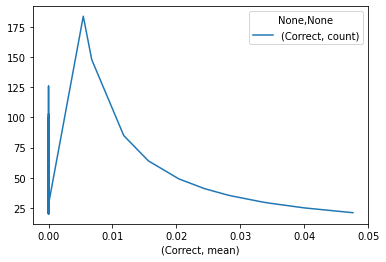

In [330]:
atleast20.plot(x = ('Correct', 'mean'), y = ('Correct', 'count'))

Question 7

Here are people that have rated correctly 

In [357]:
goodraters = rater_goodness2[rater_goodness2[('Correct', 'mean')]> 0].sort_values(('Correct', 'mean'), ascending = False)
goodraters

Correct      
                    mean count
turk                          
A1FV9SAPL5C6KY  1.000000     1
AKYD5YICB2C4L   1.000000     1
A2EG8FHODTEV63  1.000000     1
A2LM400F4F0V0M  0.250000     4
A3PARCXE6KN0UX  0.200000     5
A2TOV7KSQSHSR2  0.111111     9
A4GP97LAQCCHJ   0.083333    12
A3OHT85E1990AL  0.047619    21
A270HOAHEVIFW0  0.040000    25
A1253FXHCZ9CWM  0.034483    29
A1JTOT0DWM6QGL  0.034483    29
ATAMRO447HWJQ   0.033333    30
AZ1S5BIG5R6P6   0.028571    35
A22C0PJUBFJTI0  0.027778    36
A1PXXEOGQ76RNJ  0.024390    41
A21US576U8SCO4  0.020408    49
A35GER5TWMH9VP  0.015625    64
A3GE97GX3OXJTW  0.011765    85
A153PKAL7OAY36  0.006757   148
A31OCN4MNHUQ6W  0.005435   184

In [412]:


goodraters['numberright'] = goodraters[('Correct', 'count')]*goodraters[('Correct', 'mean')]

goodraters.sort_values(('Correct','count'), ascending = False)

goodraters[('Correct','count')]

turk
A1FV9SAPL5C6KY      1
AKYD5YICB2C4L       1
A2EG8FHODTEV63      1
A2LM400F4F0V0M      4
A3PARCXE6KN0UX      5
A2TOV7KSQSHSR2      9
A4GP97LAQCCHJ      12
A3OHT85E1990AL     21
A270HOAHEVIFW0     25
A1253FXHCZ9CWM     29
A1JTOT0DWM6QGL     29
ATAMRO447HWJQ      30
AZ1S5BIG5R6P6      35
A22C0PJUBFJTI0     36
A1PXXEOGQ76RNJ     41
A21US576U8SCO4     49
A35GER5TWMH9VP     64
A3GE97GX3OXJTW     85
A153PKAL7OAY36    148
A31OCN4MNHUQ6W    184
Name: (Correct, count), dtype: int64

Question 8

In [445]:
result_75 = pd.qcut(goodraters[('Correct','count')],
                    4,
                    labels = ['>0','>25','>50','>75'])

result_75 = pd.DataFrame(result_75)
mask = (result_75[('Correct', 'count')]== '>75')
result_75 = DataFrame(result_75[('Correct', 'count')][mask])
result_75

,Correct
,count
turk,
A21US576U8SCO4,>75
A35GER5TWMH9VP,>75
A3GE97GX3OXJTW,>75
A153PKAL7OAY36,>75
A31OCN4MNHUQ6W,>75


In [448]:
Result_75 = unknown_labels[unknown_labels['turk'].isin(result_75['turk'])]

#labels_on_gold = labels[labels['URL'].isin(gold['URL'])]

KeyError: 'turk'

Question 9

In [446]:
result_25 = pd.qcut(goodraters[('Correct','count')],
                    4,
                    labels = ['>0','>25','>50','>75'])

result_25 = pd.DataFrame(result_25)
mask = (result_25[('Correct', 'count')]!= '>0')
result_25 = DataFrame(result_25[('Correct', 'count')][mask])
result_25

,Correct
,count
turk,
A2TOV7KSQSHSR2,>25
A4GP97LAQCCHJ,>25
A3OHT85E1990AL,>25
A270HOAHEVIFW0,>25
A1253FXHCZ9CWM,>25
A1JTOT0DWM6QGL,>25
ATAMRO447HWJQ,>50
AZ1S5BIG5R6P6,>50
